# Compare available EBL models

In [1]:
import os
os.environ['GAMMAPY_EXTRA'] =r'../../input/gammapy-extra-master'
os.environ['GAMMAPY_DATA'] =r'../../input/gammapy-extra-master/datasets'

import sys
codefolder = "../" 
sys.path.append(codefolder) 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import astropy.units as u
from gammapy.modeling.models import EBLAbsorptionNormSpectralModel
from ebl import EBL_from_file, EBL_plot
from utilities import single_legend

import warnings
#warnings.filterwarnings('error')
warnings.filterwarnings('ignore')

plt.style.use('seaborn-talk') # Make the labels readable
plt.style.use('seaborn-poster') # Bigger - Make the labels readable - bug with normal x marker !!!

# Load absorption data

In [2]:
local_gilmore = EBL_from_file("data/"+"ebl_gilmore12.dat",debug=True)
local_dominguez = EBL_from_file("data/EBL_abs_RBelmont-dominguez-20170425.dat",debug=True)
dominguez    = EBLAbsorptionNormSpectralModel.read_builtin("dominguez")
franceschini = EBLAbsorptionNormSpectralModel.read_builtin("franceschini")    
finke        = EBLAbsorptionNormSpectralModel.read_builtin("finke")

 Gilmore from Lara
 Dominguez from Renaud


# Plot parameters

In [3]:
zlist = np.array([0, 0.5, 1, 2.5, 3, 4])
zlist = np.array([0, 0.2, 0.5, 1, 2,3.5])
emin = 10*u.GeV
emax = 10*u.TeV 
nebin=100
Elist   = np.logspace(np.log10(emin.value),np.log10(emax.to(emin.unit).value),nebin)*emin.unit
max_att = 1e-3 # below this limit, attenutaion at this limit to avoid insane small numbers

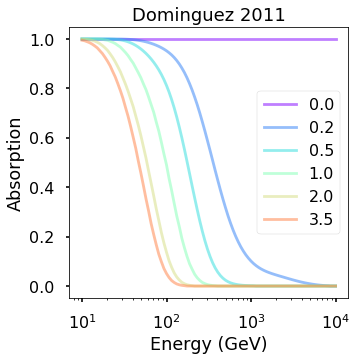

In [21]:
# Plot DOminguez
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
for i, z in enumerate(zlist):
    do_z    = dominguez.evaluate(Elist,redshift=z,alpha_norm=1)
    do_z = np.array([(x == max_att if x<max_att else x) for x in do_z])
    color = cm.rainbow(i/len(zlist)) 
    ax.plot(Elist,do_z,color=color, alpha = alpha, label=str(z))
ymin = 1e-2
ymax = 1.05
yscale = "linear"
ax.set_yscale(yscale)
ax.set_xscale("log")
ax.set_ylabel("Absorption")
ax.set_xlabel("Energy (GeV)")
ax.set_title("Dominguez 2011",size=18)
ax.legend()

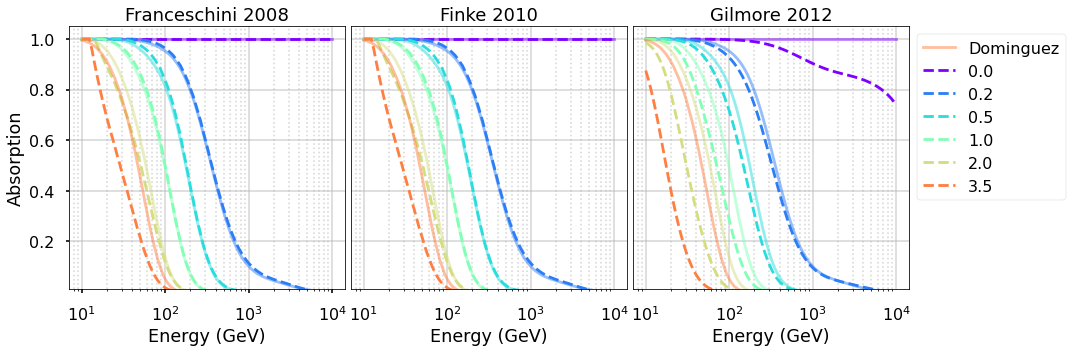

In [24]:
ratio = False
if ratio:
    fig, ((ax11,ax12,ax13), (ax21, ax22, ax23)) = plt.subplots(nrows = 2, ncols= 3, 
                                                               figsize=(15,6),
                                                               sharey = False, sharex=True,
                                                                gridspec_kw={'height_ratios': [3, 2]})
else:
    fig, (ax11,ax12,ax13) = plt.subplots(nrows = 1, ncols= 3, figsize=(15,5),sharey = False, sharex=True)

alpha =0.5
for i, z in enumerate(zlist):
#     print(z)
    color = cm.cool(i/len(zlist)) 
#     color = cm.viridis(0.7-0.7*i/len(zlist))
    color = cm.rainbow(i/len(zlist)) 
    
    # Evaluate model at given z
    do_z    = dominguez.evaluate(Elist,redshift=z,alpha_norm=1)
    do_z = np.array([(x == max_att if x<max_att else x) for x in do_z])
    
    fr_z = franceschini.evaluate(Elist,redshift=z,alpha_norm=1)
    fr_z = np.array([x == max_att if x<max_att else x for x in fr_z])

    fi_z = finke.evaluate(Elist,redshift=z,alpha_norm=1)
    fi_z = np.array([x == max_att if x<max_att else x for x in fi_z])

    gi_z = local_gilmore(Elist,z)
    gi_z = np.array([x == max_att if x<max_att else x for x in gi_z])
    
    fr_ratio = (fr_z -do_z) / do_z
    fi_ratio = (fi_z -do_z) / do_z
    gi_ratio = (gi_z -do_z) / do_z
    
    # First row, plot attentaion
    ax11.plot(Elist,do_z,color=color, alpha = alpha, label="Dominguez")
    ax11.plot(Elist,fr_z,color=color, ls="--",label=str(z))
    if not ratio: ax11.set_xlabel("Energy (GeV)")
    ax12.plot(Elist,do_z,color=color, alpha = alpha, label="Dominguez")
    ax12.plot(Elist,fr_z,color=color, ls="--",label=str(z))    
    if not ratio: ax12.set_xlabel("Energy (GeV)")
    
    ax13.plot(Elist,do_z,color=color, alpha = alpha, label="Dominguez")
    ax13.plot(Elist, gi_z,color=color,ls="--",label=str(z))
    if not ratio: ax13.set_xlabel("Energy (GeV)")
    
    if ratio:
        ax21.plot(Elist,fr_ratio, color=color,alpha=0.7)
        ax22.plot(Elist,fi_ratio, color=color,alpha=0.7)
        ax23.plot(Elist,gi_ratio, color=color,alpha=0.7)

# first row
ymin = 1e-2
ymax = 1.05
yscale = "linear"
ax11.set_ylabel("Absorption")
ax11.set_title("Franceschini 2008",size=18)

ax12.set_ylabel(None)
ax12.set_title("Finke 2010",size=18)
ax12.grid("both",which="minor",ls=":",alpha=0.5)

ax13.set_ylabel(None)
ax13.set_title("Gilmore 2012",size=18)
ax13.grid("both",which="minor",ls=":",alpha=0.5)
single_legend(ax13,bbox_to_anchor=[1,1.0])

ax12.tick_params(left = False, labelleft = False, bottom=False)
ax13.tick_params(left = False, labelleft = False, bottom=False)
for ax in [ax11,ax12,ax13]:
    ax.set_ylim(ymin=ymin)
    ax.set_ylim(ymax=ymax)
    ax.set_yscale(yscale)
    ax.set_xscale("log")
    ax.grid("both",which="minor",ls=":",alpha=0.5)    
    ax.grid("both",which="major",ls="-",alpha=0.5)

if ratio:
    # Second row
    yscale = "linear"
    ax21.set_ylabel("$Relative \ \Delta$")
    ax22.set_ylabel(None)
    ax23.set_ylabel(None)

    ax22.tick_params(left = False, labelleft = False)
    ax23.tick_params(left = False, labelleft = False)
    for ax in [ax21, ax22, ax23]:
        ax.set_xlabel("Energy (GeV)")
        ax.set_ylim(ymin=-1.5)
        ax.set_ylim(ymax=1.5)
        ax.set_yscale(yscale)
        ax.set_xscale("log")
        ax.grid("both",which="minor",ls=":",alpha=0.5)
        ax.grid("both",which="major",ls="-",alpha=0.5)
        ax.set_yticks(np.arange(-1.5, 1.5 ,0.5))

plt.tight_layout(h_pad=0,w_pad=0)